In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # formating data categorical to numerical
# import all classification algorithm to choose best performing model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Project Name :- Census Income Prediction

- US Adult Census data relating income to social factors such as Age, Education, race etc. The Us Adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of demographic information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more. 

-  The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete       list of variables is as follows:

- The Main Objective of this ptroject is to predict  whether a person makes over 50K a year.

## Attribute Information :-

- Age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,     10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-   inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,       Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,     Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-   Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Target :- 

- Income :->50K, <=50K.



## Step 1: Exploratory data analysis (EDA)
- read & preview the dataset
- variable identification # looking the input data # what will be the output variable
- univariate analysis - tacking small small variable and plot bar chart and finding histogram
- Bivariate analysis - tacking two column or two variable and looking the relationship between the,and also find correlation       and covariance within two variable
- handling and removing null values- missing data
- Handling Categorical Variabl
- finding and removing outliers

In [2]:
# Loading the dataset and also need define column names

columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

adult_df = pd.read_csv('adult-training.csv',names = columns)

In [3]:
adult_df

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
adult_test_df = pd.read_csv('adult-test.csv',names = columns,na_values='?')

# let's see after passing na_values='?' , the system findind '?' value as na 

In [5]:
# preview the dataset test dataset
adult_test_df

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
# let's combine the adult_train and adult_test dataset togeter to do EDA
census = pd.concat([adult_test_df,adult_df])

In [7]:
#Information about the data columns

census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   fnlgwt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education num   48842 non-null  int64 
 5   Marital Status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital Gain    48842 non-null  int64 
 11  Capital Loss    48842 non-null  int64 
 12  Hours/Week      48842 non-null  int64 
 13  Native country  48842 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [8]:
# let's check the datatypes of all feature which present in dataset

census.dtypes


Age                int64
Workclass         object
fnlgwt             int64
Education         object
Education num      int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours/Week         int64
Native country    object
Income            object
dtype: object

In [9]:
# now check feature name presence in the dataset
census.columns

Index(['Age', 'Workclass', 'fnlgwt', 'Education', 'Education num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours/Week', 'Native country',
       'Income'],
      dtype='object')

In [10]:
type(census)

pandas.core.frame.DataFrame

In [11]:
# # let's finding null and nan values whether it is available in cencus_income dataset or not.

print('total number of null values:\n',census.isnull().sum())
print('\n')
print('total number of Nan values:\n',census.isna().sum())

# we see our system not able to find "?" as na_values, let' try in other way 

total number of null values:
 Age               0
Workclass         0
fnlgwt            0
Education         0
Education num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Native country    0
Income            0
dtype: int64


total number of Nan values:
 Age               0
Workclass         0
fnlgwt            0
Education         0
Education num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Native country    0
Income            0
dtype: int64


In [12]:
# let's check how many unique values presents in the each columns in the dataset

for col in census.columns:
    print(census[col].unique(),"\t",census[col].nunique())
    

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86] 	 74
[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 	 9
[226802  89814 336951 ... 129912 255835 257302] 	 28523
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool'] 	 16
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] 	 16
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse'] 	 7
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transp

# observation :-

- in the Native_Country, Occupation and Workclass columns has still unknown values which represented by "?" so we can replace -   with np.nan.
- The census dataset has 48242 rows with 15 features.
- as we check from above, income column show four class because '.' at the end of some income class so we need to treat them  

In [13]:
# let's replace "?" as nan using np.nan method
#census['Workclass']= census['Workclass'].replace("?",np.nan).astype(str)
# we are not able chane using np.nan string "?" as nan

In [14]:
# let's try to replace "?" using .apply function by passing lambda function 

census['Workclass']=census['Workclass'].apply(lambda x:x.replace('?','unknown'))
census['Occupation']=census['Occupation'].apply(lambda x:x.replace('?','unknown'))
census['Native country']=census['Native country'].apply(lambda x:x.replace('?','unknown'))

In [15]:
# let's check string"?" replace with NaN or not
print(census['Workclass'].value_counts())
print("\n")
print(census['Occupation'].value_counts())
print("\n")
print(census['Native country'].value_counts())

# As we check below it is unknown value "?", we replace with NaN 

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 unknown              2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: Workclass, dtype: int64


 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 unknown              2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: Occupation, dtype: int64


 United-States                 43832
 Mexico                          951
 unknown                         857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                

In [16]:
# let's check again missing values in following columns shows or not
census.isnull().sum()

Age               0
Workclass         0
fnlgwt            0
Education         0
Education num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Native country    0
Income            0
dtype: int64

In [17]:
# let's check  shape of the census_ income dataset
print(census.shape)

(48842, 15)


In [18]:
#let's remove "." from income class by replace function

census['Income']=census['Income'].str.replace(".","") 

In [19]:
# let's check again value counts of income column

census['Income'].value_counts()

# after replace "." with "" string we got our two class <=50k and >50k

 <=50K    37155
 >50K     11687
Name: Income, dtype: int64

In [20]:
# univariate analysis of Numerical  variables using a describe() function
# describe function provide  statistics summary of continuous variable.

census.describe()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
# let's check detail information of categorical and boolean varible
    
census.describe(include=['object', 'bool'])


,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Native country,Income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


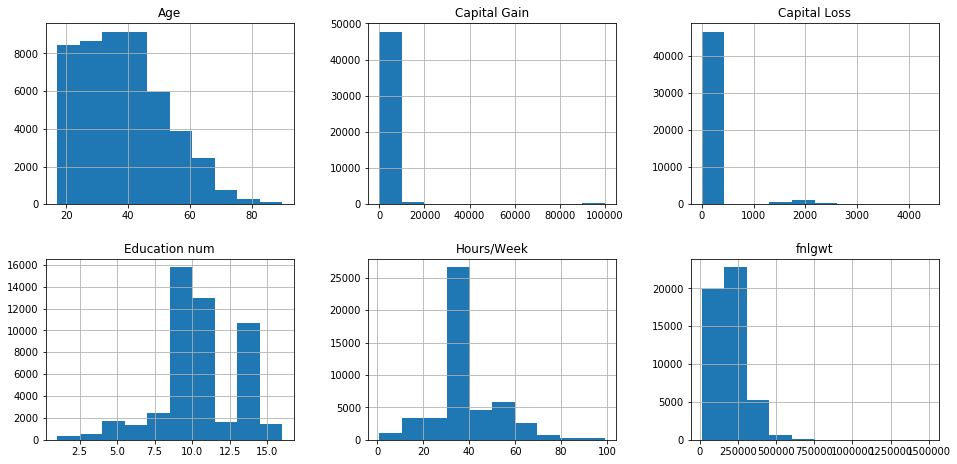

In [22]:
# let's do ploting using histogram to know about numerical variabkles in the dataset whether it is normal distribution or not.

census.hist(figsize=(16,12),layout=(3,3))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x186345867c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1863458de88>,
 'boxes': [<matplotlib.lines.Line2D at 0x18634589288>],
 'medians': [<matplotlib.lines.Line2D at 0x18634591bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x18634591cc8>],
 'means': []}

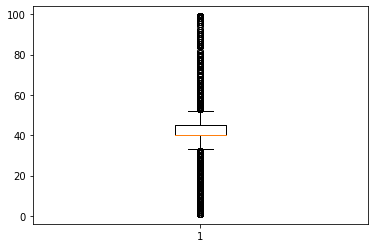

In [23]:
# let's ploting boxplot to check outliers presence or not
plt.boxplot(census['Hours/Week'])

{'whiskers': [<matplotlib.lines.Line2D at 0x186345ea5c8>,
 'caps': [<matplotlib.lines.Line2D at 0x186345eaf08>,
 'boxes': [<matplotlib.lines.Line2D at 0x186345e5cc8>],
 'medians': [<matplotlib.lines.Line2D at 0x186345f0e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x186345f4d08>],
 'means': []}

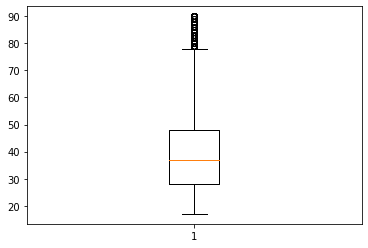

In [24]:
# let's check age columns
plt.boxplot(census['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1863405ff08>,
 'caps': [<matplotlib.lines.Line2D at 0x1863405f3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1863405bb08>],
 'medians': [<matplotlib.lines.Line2D at 0x1863403ec48>],
 'fliers': [<matplotlib.lines.Line2D at 0x18634046348>],
 'means': []}

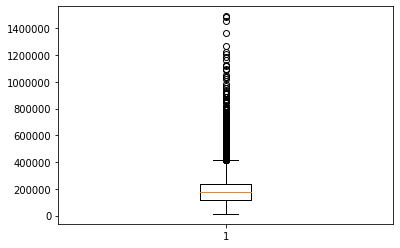

In [25]:
plt.boxplot(census['fnlgwt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18633fe20c8>,
 'caps': [<matplotlib.lines.Line2D at 0x18633fe2408>,
 'boxes': [<matplotlib.lines.Line2D at 0x186340afb88>],
 'medians': [<matplotlib.lines.Line2D at 0x186340bdc08>],
 'fliers': [<matplotlib.lines.Line2D at 0x186340bd388>],
 'means': []}

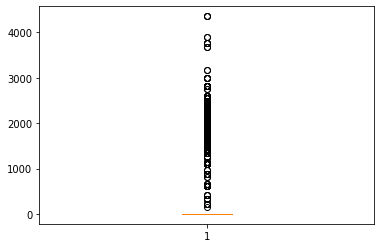

In [26]:
plt.boxplot(census['Capital Loss'])

In [27]:
#lets check the skewness of the dataset using skew function
census.skew()

Age               0.557580
fnlgwt            1.438892
Education num    -0.316525
Capital Gain     11.894659
Capital Loss      4.569809
Hours/Week        0.238750
dtype: float64

# Key Observation :-

- The Census income dataset has 48841 rows with 15 features.

- in which income feature name is our dependent variable.

- we replace'?' string values with Unknown  .

- dataset has  missing values in workclass,occupation and native place is high  and we need to treat them. 

- Maximum value of capital gain,capital loss,age,and hours/per week columns which are far above 75% quartile range.This is       definitely an outlier or huge difference between min and max in Capital Gain and Capital Loss for these two columns are         highly skewed.

- the histogram of age column show people from age of 18 to 50 more in the Cencus _income dataset.

- the histogram hours per week show high number of people working 30 hours to 40 hours per week.

- from the histogram we say that people having Capital Loss and Capital gain is zero rether than some people.

- As per the above boxplot we can say that Age,hours per week and fnlgwt having outliers so we have to remove that.

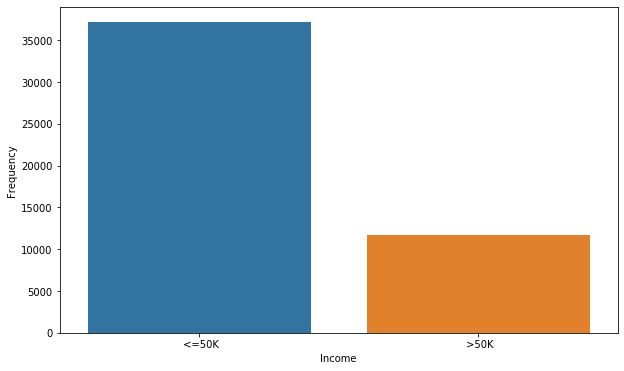

In [28]:
# let's check income wether is balance or imbalance
plt.figure(figsize =(10,6));
sns.countplot(x = 'Income', data = census);
plt.xlabel("Income");
plt.ylabel("Frequency");

# the below graph show the income column data is highly imbalanced
# because <=50k income class people is very high in the dataset

In [29]:
# let's check what percentage of people have capital income zero

census['Capital Gain'].value_counts(normalize=True)

# almost 92% peoplw have capital Gain zero only 8% people have capital income grater than 0

0        0.917387
15024    0.010503
7688     0.008394
7298     0.007453
99999    0.004996
           ...   
2387     0.000020
22040    0.000020
6612     0.000020
1111     0.000020
1639     0.000020
Name: Capital Gain, Length: 123, dtype: float64

Text(0, 0.5, 'Capital Gain')

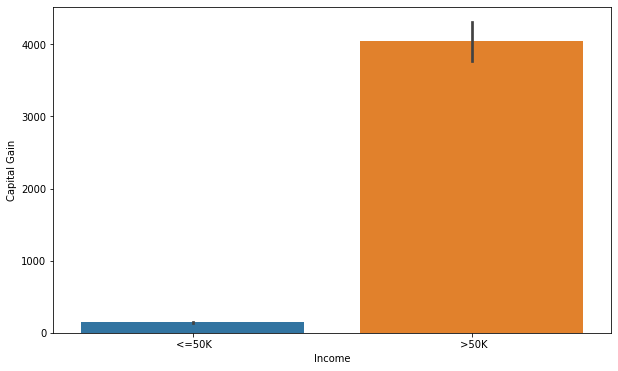

In [30]:
# let's plot count plot for capital loss
plt.figure(figsize =(10,6));
sns.barplot(x ='Income',y='Capital Gain',data =census)
plt.xlabel("Income")
plt.ylabel("Capital Gain")

# the below graph say that where people income is greater than >50K their capital Gain is high.

Text(0, 0.5, 'Capital Loss')

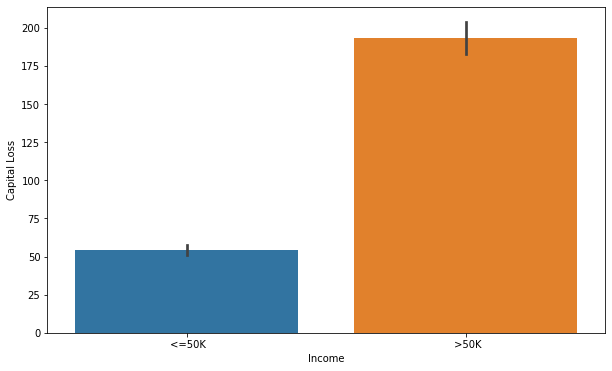

In [31]:
# let's plot bargraph to understand capital Loss wise income

plt.figure(figsize =(10,6))
sns.barplot(x ='Income',y='Capital Loss',data =census)
plt.xlabel("Income")
plt.ylabel("Capital Loss")

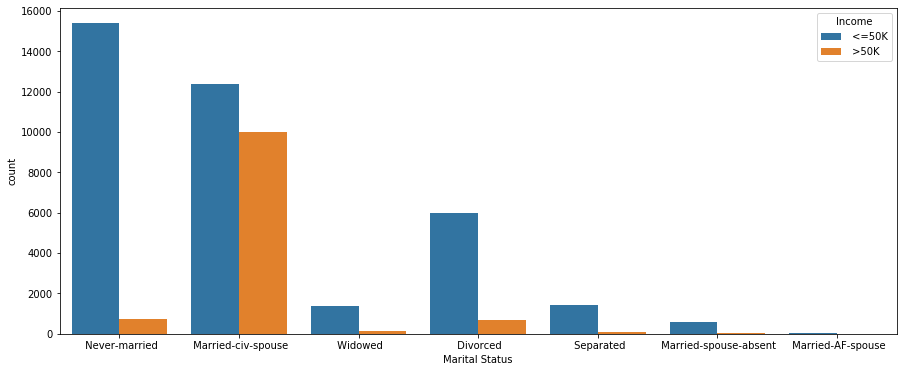

In [32]:
#lets check the count of Income considering with "Married Status"

plt.figure(figsize =(15,6))
sns.countplot(x="Marital Status",hue="Income",data=census)
plt.show()

# from the below graph we say that never-married people highly contribute <=50k
# and married people highly earn salary greater than 50K.

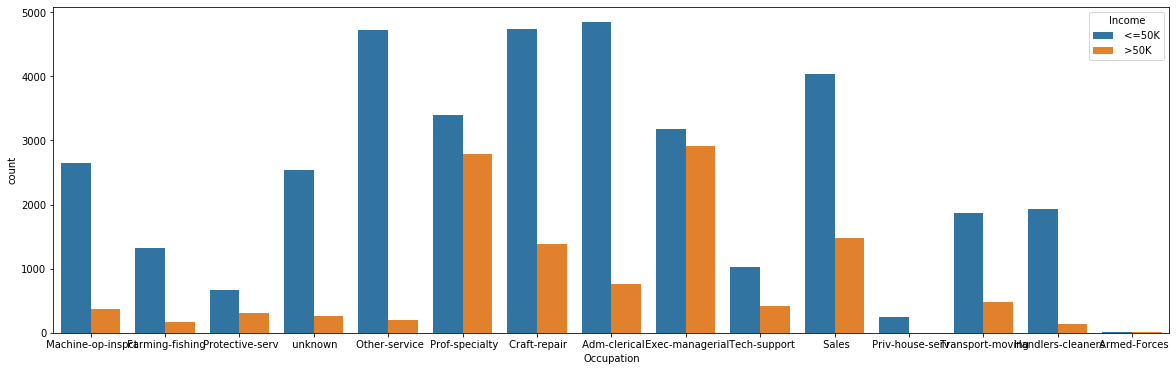

In [33]:
#lets check the count of income wise occupation

plt.figure(figsize =(20,6))
sns.countplot(x="Occupation",hue="Income",data=census)
plt.show()

# people working as professor,manager,sales person,and carft repair they are earning salary Greater than 50k.
# People who are working in other services and admine they earn <=50k.

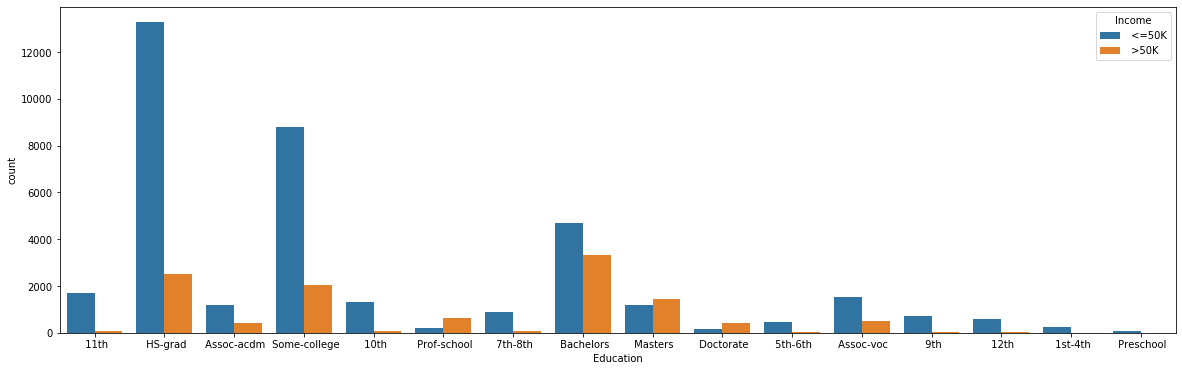

In [34]:

#lets see the count of income wise Education

plt.figure(figsize =(20,6))
sns.countplot(x="Education",hue="Income",data=census)
plt.show()

# people having only higher secondary degree are earning salary less than 50K
# People having degree doctorate,prof-school,masters are earning salary more than 50K

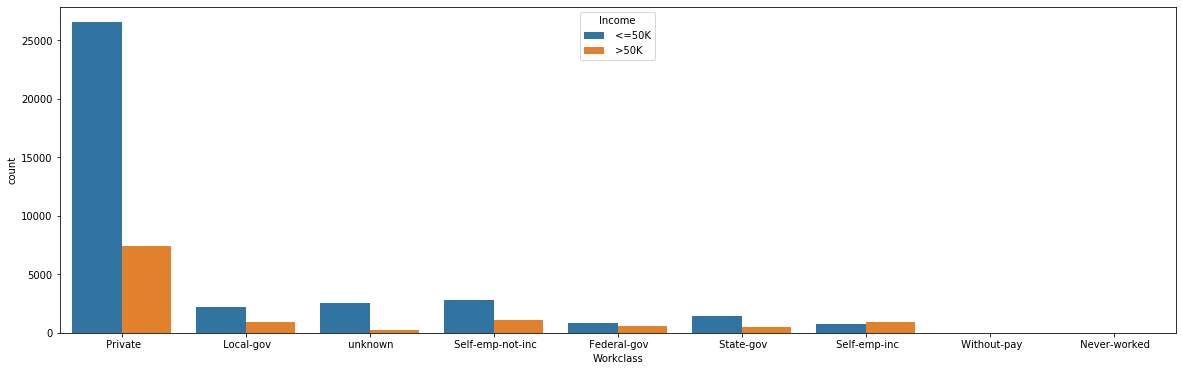

In [35]:
#lets see the count of income wise Education

plt.figure(figsize =(20,6))
sns.countplot(x="Workclass",hue="Income",data=census)
plt.show()

# most of the people who working in private sectore thery are earning salary less than 50K

In [36]:
census['Sex'].value_counts(normalize=True)

 Male      0.668482
 Female    0.331518
Name: Sex, dtype: float64

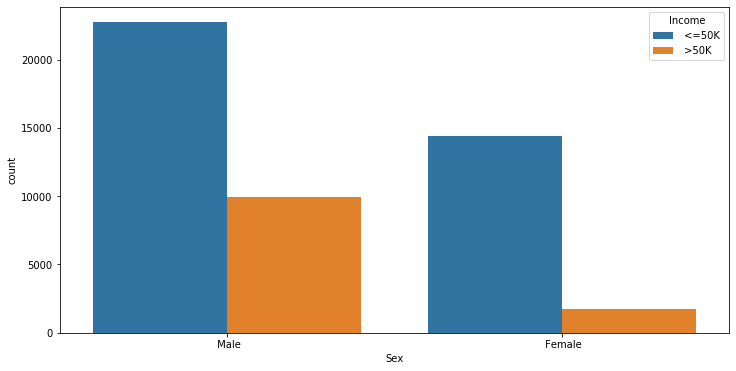

In [37]:
# let's seen sex wise income distribution
plt.figure(figsize =(12,6))
sns.countplot(x="Sex",hue="Income",data=census)
plt.show()

# sex column having 65% percentage of male in which  high no. of male  person earning  income less than 50k.

In [38]:
# let's check correlation between numerical varible
data = census.corr()

In [39]:
data

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week
Age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlgwt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
Education num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
Capital Gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
Capital Loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
Hours/Week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [40]:
# let's drop feature who are not useful in prediction
census.drop(columns=['Education num','Relationship'], inplace=True)

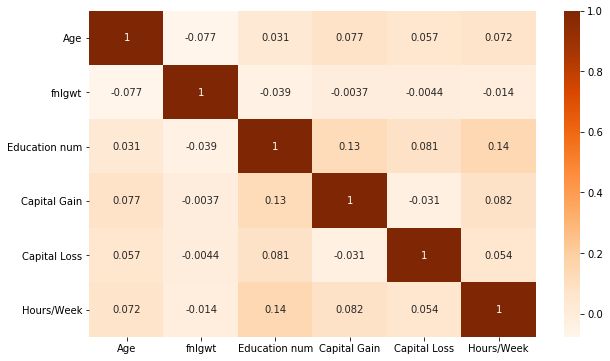

In [41]:
#get correlation of each feature in the dataset
# visualize correlation matrix using heatmap

plt.figure(figsize=(10,6))
sns.heatmap(data,cmap='Oranges',annot=True) 

# Age and Hours per week are strongly correlated with each others
# capital gain and hours per week also positively correlated with each others.

In [42]:
# let's convert all our categorical varibles into numeric by encoding the categories
# we using labelEncoder for that
 
label = LabelEncoder()
for col in census:
     if census[col].dtype == 'object':
        census[col] = label.fit_transform(census[col].astype('str'))

In [43]:
census.dtypes

Age               int64
Workclass         int32
fnlgwt            int64
Education         int32
Marital Status    int32
Occupation        int32
Race              int32
Sex               int32
Capital Gain      int64
Capital Loss      int64
Hours/Week        int64
Native country    int32
Income            int32
dtype: object

In [44]:
census.head()

,Age,Workclass,fnlgwt,Education,Marital Status,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,25,3,226802,1,4,6,2,1,0,0,40,38,0
1,38,3,89814,11,2,4,4,1,0,0,50,38,0
2,28,1,336951,7,2,10,4,1,0,0,40,38,1
3,44,3,160323,15,2,6,2,1,7688,0,40,38,1
4,18,8,103497,15,4,14,4,0,0,0,30,38,0


In [45]:
# lets remove outliers from loan dataset
# let's check and remove outliers in the dataset using z_score method
from scipy.stats import zscore

z_score=abs(zscore(census))
print(census.shape)
census=census.loc[(z_score<3).all(axis=1)]
print(census.shape)

# we can see after removing outliers from the dataset we have 41923 rows and 13 columns presents in dataset

(48842, 13)
(41923, 13)


In [46]:
#Now seperate the dataset into x and y
x = census.drop('Income',axis=1)
y = census['Income']

In [47]:
# let's treat skewness of dataset 

for feature in x.columns:
    if x.skew().loc[feature]>0.5:
        x[feature]=np.log1p(x[feature])
    

In [48]:
# let's check again skewness
x.skew()

#As we see after removing outliers capital loss is highly skewed

Age                0.486401
Workclass         -1.123370
fnlgwt            -0.942590
Education         -0.944573
Marital Status    -0.046983
Occupation         0.134018
Race              -2.594814
Sex               -0.688917
Capital Gain       3.143842
Capital Loss      26.396939
Hours/Week        -0.363662
Native country    -4.997544
dtype: float64

In [49]:
#let's check shape x and y
print(x.shape)
print(y.shape)

(41923, 12)
(41923,)


In [50]:
#Applying Standard scaling to get optimized result

#Lets bring features to common scale

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [51]:
# Train and Test splitting of data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [52]:
print(x_train.shape)
print(y_train.shape)

(32699, 12)
(32699,)


In [53]:
print(x_test.shape)
print(y_test.shape)

(9224, 12)
(9224,)


# Our training and testing data is ready now to perform machine learning algorithm¶

## Census Income prediction is a classification problem , so we can use Multiple classification algorithm with hyperparameter tune.

- first we use Logistic regression model because the target variable hold binary classification (0 and 1) to check  accuracy      score level.
- we also used different classification model to check and compare whether we get high accuracy score or not, this exercise       help us to select best model.

##  We will use the following algorithms

- Logistic Regression
- knn
- DecisionTrees
- Random Forests
- SVM
- naviebyes


In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def max_accuracyscore(mod,x,y):
    max_accuracy_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = r_state)  
        mod.fit(x_train,y_train)
        y_pred = mod.predict(x_test)
        a_score=accuracy_score(y_test,y_pred)
        if a_score>max_accuracy_score:
            max_accuracy_score=a_score
            final_r_state=r_state
    print("max Accuracy_Score corresponding to ",final_r_state," is ",max_accuracy_score)
    return final_r_state

In [55]:
#Lets use logistic regression and check

lg =LogisticRegression()
max_accuracyscore(lg ,x,y)

max Accuracy_Score corresponding to  50  is  0.8049653078924545


50

In [56]:
# Lets use cross validation metod to get cross val score because target varible is imbalanced

from sklearn.model_selection import cross_val_score

print("Mean accuracy score for Logistic Regression: ",cross_val_score(lg,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Logistic Regression: ",cross_val_score(lg,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(lg,x,y,cv=5,scoring="accuracy"))

Mean accuracy score for Logistic Regression:  0.7991556794439362
standard deviation in accuracy score for Logistic Regression:  0.0034967210613685213


cross val accuracy score: [0.8        0.80095408 0.79296363 0.79842557 0.80343511]


In [57]:
# let's use Bernoulli Naive Bayes model

from sklearn.naive_bayes import GaussianNB

Gan = GaussianNB()
max_accuracyscore(Gan,x,y)

# as we see we get less accuracy as compare Logistic regression

max Accuracy_Score corresponding to  53  is  0.7678881179531657


53

In [58]:
print("Mean accuracy score for GaussianNB: ",cross_val_score(Gan,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for GaussianNB: ",cross_val_score(Gan,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(Gan,x,y,cv=5,scoring="accuracy"))


Mean accuracy score for GaussianNB:  0.7542636796897405
standard deviation in accuracy score for GaussianNB:  0.010747650321729483


cross val accuracy score: [0.76326774 0.74144305 0.76183661 0.74081584 0.76395515]


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
gb=GradientBoostingClassifier()
gv = GridSearchCV(gb, parameters, cv=5,scoring="accuracy")
gv.fit(x,y)
gv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [60]:
gb=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1)
max_accuracyscore(gb,x,y)

max Accuracy_Score corresponding to  98  is  0.8752168256721596


98

In [68]:
# till the time a gradient boosting perform very well as compare logistic regession and GaussianNB model
# let's save as final model gradient boosting
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =53,test_size=0.22)
gb=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
a_score=accuracy_score(y_test,y_pred)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

Confusion matrix 
 [[6783  399]
 [ 797 1245]]
classification report 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      7182
           1       0.76      0.61      0.68      2042

    accuracy                           0.87      9224
   macro avg       0.83      0.78      0.80      9224
weighted avg       0.86      0.87      0.87      9224



In [61]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for GradientBoosting Model: ",cross_val_score(gb,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for GradientBoosting Model: ",cross_val_score(gb,x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val RandomForest:',cross_val_score(gb,x,y,cv=5,scoring="accuracy"))

Mean accuracy score for GradientBoosting Model:  0.8693796344344454
standard deviation in accuracy score for GradientBoosting Model:  0.0028943069352835213


cross val RandomForest: [0.86809779 0.86845558 0.86917114 0.86617366 0.87488073]


In [63]:
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_prob=gb.predict_proba(x_test)[:,1]


In [64]:
fpr,tpr,treshold = roc_curve(y_test,y_pred_prob)

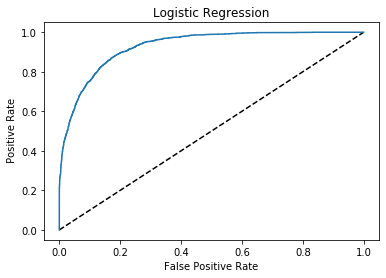

In [66]:
y_pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,treshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel(' Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [67]:
auc_score= roc_auc_score(y_test,gb.predict(x_test))
auc_score

0.7895333405480529

In [69]:
from sklearn.externals import joblib

# save the model as a pickle in a file

joblib.dump(gb,'Census_Income_Prediction.pkl')

['Census_Income_Prediction.pkl']